# **Mevkisel Bazlı Sınıflandırma || Defans - 3 Classes**

---



## **Preprocess ve kümeleme**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

Mounted at /content/drive


In [2]:
df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/IZVA-Proje/Data/RawData.xlsx")
df.drop(labels = ['Unnamed: 0',"keyPassPerGame_y"],inplace=True,axis=1)
df.rename( {"keyPassPerGame_x":"keyPassPerGame"}, inplace=True)

In [3]:
df.head()

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue
0,402048,Erdem,Canpolat,Goalkeeper,Kasimpasa,14,194,85,20,1,1,0,1,1,0,90,0,0,1,0,0.0,0.000000,0.000000,0.000000,28.000000,60.714286,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,50000,50000
1,77438,Cenk,Tosun,Forward,Besiktas,1,183,78,30,1,1,0,3,2,1,175,3,1,0,0,10.0,3.333333,0.300000,1.000000,11.666667,74.285714,0.666667,0.666667,0.0,0.333333,1.000000,0.333333,0.333333,1.00000,0.0,0.000000,0.666667,0.333333,0.000000,1.000000,0.000000,1.333333,10000000,5000000
2,386144,Mustafa Burak,Bozan,Goalkeeper,Gaziantep FK,9,190,80,21,0,0,0,1,1,0,90,0,0,0,0,0.0,0.000000,0.000000,0.000000,27.000000,55.555556,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,2.000000,50000,50000
3,95423,Rachid,Ghezzal,Midfielder,Besiktas,1,182,70,29,1,1,1,31,30,1,2421,8,17,5,0,56.0,1.806452,0.142857,2.870968,44.806452,80.273578,1.838710,1.548387,0.0,1.838710,1.967742,1.483871,0.580645,1.16129,0.0,0.354839,1.612903,0.129032,2.193548,1.967742,0.129032,1.096774,5500000,12000000
4,98123,Mario,Situm,Forward,Kayserispor,17,177,76,29,1,1,1,1,1,0,90,0,0,0,0,1.0,1.000000,0.000000,0.000000,31.000000,67.741935,2.000000,2.000000,0.0,0.000000,2.000000,1.000000,4.000000,2.00000,0.0,3.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,675000,600000


In [4]:
def mevki(x):
  if x =='Goalkeeper':
    return 0
  if x=='Defender':
    return 1
  if x=='Midfielder':
    return 2
  if x=='Forward':
    return 3
df['position'] = df.positionText.apply(mevki)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new = df[['apps','minsPlayed','firstStart']]
df_new.index = df.iloc[:,1]  + " " + df.iloc[:,2]
scaled_df = scaler.fit_transform(df_new)
kmeanss = KMeans(4)
kmeanss.fit(scaled_df)
df_new['kumeNoKmeans'] = kmeanss.labels_


In [6]:
df['kumeNoKmeans'] = kmeanss.labels_

In [7]:
df.head(15)

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans
0,402048,Erdem,Canpolat,Goalkeeper,Kasimpasa,14,194,85,20,1,1,0,1,1,0,90,0,0,1,0,0.0,0.000000,0.000000,0.000000,28.000000,60.714286,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,50000,50000,0,3
1,77438,Cenk,Tosun,Forward,Besiktas,1,183,78,30,1,1,0,3,2,1,175,3,1,0,0,10.0,3.333333,0.300000,1.000000,11.666667,74.285714,0.666667,0.666667,0.000000,0.333333,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.666667,0.333333,0.000000,1.000000,0.000000,1.333333,10000000,5000000,3,3
2,386144,Mustafa Burak,Bozan,Goalkeeper,Gaziantep FK,9,190,80,21,0,0,0,1,1,0,90,0,0,0,0,0.0,0.000000,0.000000,0.000000,27.000000,55.555556,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,2.000000,50000,50000,0,3
3,95423,Rachid,Ghezzal,Midfielder,Besiktas,1,182,70,29,1,1,1,31,30,1,2421,8,17,5,0,56.0,1.806452,0.142857,2.870968,44.806452,80.273578,1.838710,1.548387,0.000000,1.838710,1.967742,1.483871,0.580645,1.161290,0.000000,0.354839,1.612903,0.129032,2.193548,1.967742,0.129032,1.096774,5500000,12000000,2,0
4,98123,Mario,Situm,Forward,Kayserispor,17,177,76,29,1,1,1,1,1,0,90,0,0,0,0,1.0,1.000000,0.000000,0.000000,31.000000,67.741935,2.000000,2.000000,0.000000,0.000000,2.000000,1.000000,4.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,675000,600000,3,3
5,31388,Diego,Perotti,Midfielder,Fenerbahce,3,179,70,33,1,1,1,4,2,2,193,3,0,0,0,11.0,2.750000,0.272727,0.500000,17.250000,82.608696,1.500000,1.000000,0.250000,0.750000,0.750000,2.250000,1.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.500000,0.000000,0.500000,4000000,1800000,2,3
6,86081,Anastasios,Bakasetas,Forward,Trabzonspor,4,181,75,28,1,0,1,19,18,1,1603,7,2,5,0,53.0,2.789474,0.132075,1.842105,44.421053,84.241706,1.631579,1.736842,0.000000,1.105263,1.263158,1.526316,0.315789,1.421053,0.052632,0.263158,0.578947,0.000000,1.684211,3.526316,0.105263,0.736842,5000000,7000000,3,2
7,136320,Gastón,Campi,Defender,Fatih Karagumruk,8,193,88,30,1,0,1,3,2,1,243,1,1,0,0,2.0,0.466667,0.500000,0.333333,41.666667,84.800000,0.000000,0.133333,0.000000,0.000000,0.333333,0.666667,1.666667,0.666667,0.000000,4.000000,0.333333,0.333333,0.000000,3.666667,0.000000,5.666667,1300000,1200000,1,3
8,124209,Caleb,Ekuban,Forward,Trabzonspor,4,188,80,27,0,0,1,32,32,0,2748,10,4,3,0,71.0,2.218750,0.140845,1.437500,32.343750,78.067633,2.406250,1.781250,0.093750,1.937500,3.156250,1.281250,0.687500,1.250000,0.031250,0.531250,0.625000,0.156250,0.156250,0.937500,0.000000,1.437500,5500000,7000000,3,0
9,327719,Anthony,Nwakaeme,Forward,Trabzonspor,4,185,80,32,0,0,1,34,34,0,2970,7,5,3,1,105.0,3.088235,0.066667,1.235294,41.294118,79.059829,2.852941,1.088235,0.411765,2.735294,2.352941,1.558824,0.764706,1.000000,0.088235,1.029412,0.970588,0.029412,0.470588,2.617647,0.029412,1.117647,5000000,5000000,3,0


In [8]:
df_Without_Cluster3 = df.loc[df.kumeNoKmeans != 3] # küme 3 ü veriye dahil etmiyoruz.

In [10]:
df_Without_Cluster3.describe()

,playerId,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.00000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,4.610000e+02,4.610000e+02,461.000000,461.000000
mean,175885.913232,11.052061,180.774403,69.034707,28.733189,0.542299,0.331887,0.620390,24.754881,18.81128,5.943601,1677.915401,2.273319,1.490239,3.468547,0.240781,19.967462,0.760748,0.092084,0.559325,28.532469,79.125786,0.570955,0.791936,0.115140,0.541779,1.015908,0.977353,0.792346,0.879775,0.119957,1.108367,0.583099,0.176522,0.279421,1.862778,0.015595,1.000821,1.580260e+06,1.743275e+06,1.744035,1.075922
std,132686.355162,6.093609,13.532291,22.202107,3.982075,0.498749,0.471402,0.485817,8.389862,9.90395,5.600181,840.448995,3.224755,2.039398,2.603006,0.494037,19.723662,0.641440,0.108870,0.454263,13.777950,7.527542,0.513878,0.504027,0.165159,0.445185,0.721305,0.627720,0.594305,0.491306,0.196976,1.169128,0.386115,0.222012,0.392693,1.646029,0.032393,0.857759,1.978186e+06,2.190565e+06,0.859469,0.799922
min,4092.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,8.000000,1.00000,0.000000,219.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000,49.881235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,7.500000e+04,0.000000,0.000000
25%,70541.000000,6.000000,177.000000,70.000000,26.000000,0.000000,0.000000,0.000000,18.000000,10.00000,1.000000,923.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.280000,0.000000,0.238095,17.933333,74.940334,0.187500,0.440000,0.000000,0.200000,0.480000,0.538462,0.263158,0.555556,0.000000,0.285714,0.307692,0.000000,0.026316,0.600000,0.000000,0.388889,4.750000e+05,5.000000e+05,1.000000,0.000000
50%,118216.000000,11.000000,181.000000,75.000000,29.000000,1.000000,0.000000,1.000000,25.000000,18.00000,5.000000,1587.000000,1.000000,1.000000,3.000000,0.000000,13.000000,0.562500,0.076923,0.464286,27.243243,80.534351,0.444444,0.687500,0.051282,0.454545,0.923077,0.913043,0.684211,0.846154,0.027778,0.666667,0.535714,0.096774,0.130435,1.388889,0.000000,0.750000,9.000000e+05,1.000000e+06,2.000000,1.000000
75%,319388.000000,17.000000,186.000000,79.000000,32.000000,1.000000,1.000000,1.000000,32.000000,26.00000,9.000000,2365.000000,3.000000,2.000000,5.000000,0.000000,28.000000,1.114286,0.139535,0.805556,37.135135,84.474886,0.810811,1.055556,0.162162,0.750000,1.371429,1.352941,1.242424,1.161290,0.178571,1.484848,0.793103,0.235294,0.368421,2.650000,0.027027,1.375000,1.900000e+06,2.000000e+06,2.000000,2.000000
max,409837.000000,21.000000,203.000000,95.000000,38.000000,1.000000,1.000000,1.000000,40.000000,39.00000,31.000000,3424.000000,22.000000,17.000000,14.000000,3.000000,111.000000,3.088235,0.800000,2.870968,76.968750,92.627599,3.933333,3.352941,0.818182,2.735294,4.000000,3.645161,2.421053,2.606061,1.384615,6.037037,2.028571,1.300000,2.529412,8.291667,0.227273,5.357143,1.600000e+07,1.900000e+07,3.000000,2.000000


In [11]:
df_Without_Cluster3.isna().sum()

playerId                      0
firstName                     0
lastName                      0
positionText                  0
teamName                      0
teamRank                      0
height                        0
weight                        0
age                           0
newToTeam                     0
newToLeague                   0
foreign                       0
apps                          0
firstStart                    0
subOn                         0
minsPlayed                    0
goal                          0
assistTotal                   0
yellowCard                    0
redCard                       0
totalShots                    0
shotsPerGame                  0
goalShotRatio                 0
keyPassPerGame_x              0
totalPassesPerGame            0
passSuccess                   0
dribbleWonPerGame             0
foulGivenPerGame              0
offsideGivenPerGame           0
dispossessedPerGame           0
turnoverPerGame               0
tacklePe

## **Yeni Target oluşturma**

In [12]:
df_Without_Cluster3['newTarget'] = ((df.currentValue-df.preValue)/(df.preValue))*100 

In [13]:
df_Without_Cluster3['newTarget'].describe()

count     461.000000
mean       70.562121
std       483.255194
min       -86.666667
25%       -26.666667
50%         0.000000
75%        45.454545
max      8400.000000
Name: newTarget, dtype: float64

In [14]:
df_Without_Cluster3.newTarget.skew(),df_Without_Cluster3.newTarget.kurtosis()

(13.451649398224532, 211.0395194723431)

**Target Değişkenimizin Dağılımı**

Text(0.5, 1.0, ' newTarget Distribution Plot')

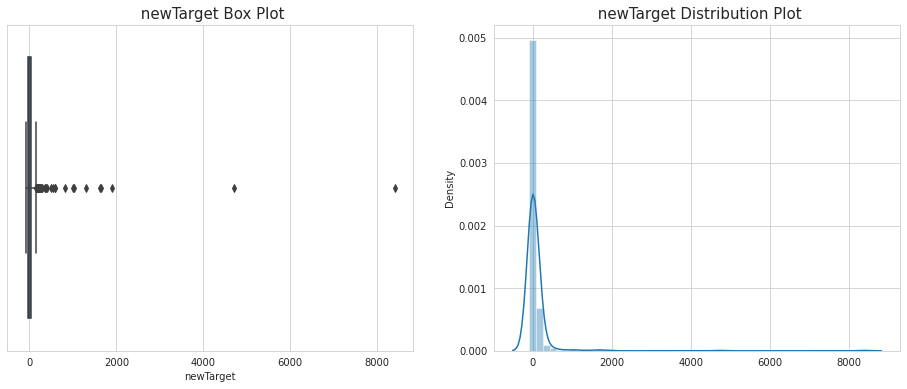

In [15]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="newTarget",data=df_Without_Cluster3)
plt.title(' newTarget Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df_Without_Cluster3["newTarget"])
plt.title(' newTarget Distribution Plot', fontsize=15)

In [16]:
!pip install feature-engine
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

     |████████████████████████████████| 205 kB 16.6 MB/s 
     |████████████████████████████████| 9.8 MB 50.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [17]:
df_Without_Cluster3.isna().sum()


playerId                      0
firstName                     0
lastName                      0
positionText                  0
teamName                      0
teamRank                      0
height                        0
weight                        0
age                           0
newToTeam                     0
newToLeague                   0
foreign                       0
apps                          0
firstStart                    0
subOn                         0
minsPlayed                    0
goal                          0
assistTotal                   0
yellowCard                    0
redCard                       0
totalShots                    0
shotsPerGame                  0
goalShotRatio                 0
keyPassPerGame_x              0
totalPassesPerGame            0
passSuccess                   0
dribbleWonPerGame             0
foulGivenPerGame              0
offsideGivenPerGame           0
dispossessedPerGame           0
turnoverPerGame               0
tacklePe

In [18]:
df_Without_Cluster3.dropna(axis =0 , inplace = True)

In [19]:
discretizer = EqualFrequencyDiscretiser(q=3, variables = ['newTarget'])
discretizer.fit(df_Without_Cluster3)

EqualFrequencyDiscretiser(q=3, variables=['newTarget'])

In [20]:
df_new = discretizer.transform(df_Without_Cluster3)
df_new['newTarget'].describe()

count    461.000000
mean       0.997831
std        0.816937
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: newTarget, dtype: float64

Text(0.5, 1.0, ' newTarget Distribution Plot')

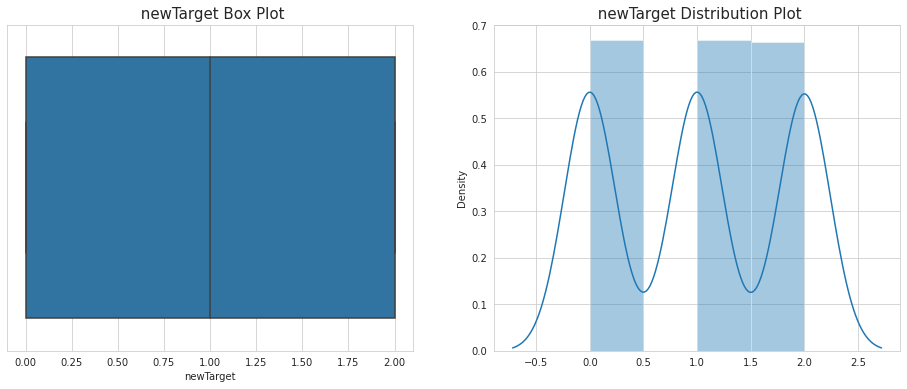

In [21]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="newTarget",data=df_new)
plt.title(' newTarget Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df_new["newTarget"])
plt.title(' newTarget Distribution Plot', fontsize=15)

In [22]:
discretizer.binner_dict_

{'newTarget': [-inf, -17.320261437908517, 25.0, inf]}

Text(0, 0.5, 'Number of Players')

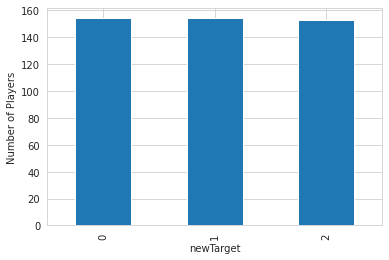

In [23]:
# with equal frequency discretisation, each bin contains approximately
# the same number of observations.
df_new.groupby('newTarget')['newTarget'].count().plot.bar()
plt.ylabel('Number of Players')

In [24]:
df_new['newTarget'].value_counts()

1    154
0    154
2    153
Name: newTarget, dtype: int64

In [25]:

  

df_new['ValuationRatio'] = df_new['newTarget']



In [26]:
df_new['ValuationRatio'].value_counts()

1    154
0    154
2    153
Name: ValuationRatio, dtype: int64

Text(0.5, 1.0, ' ValuationRatio Distribution Plot')

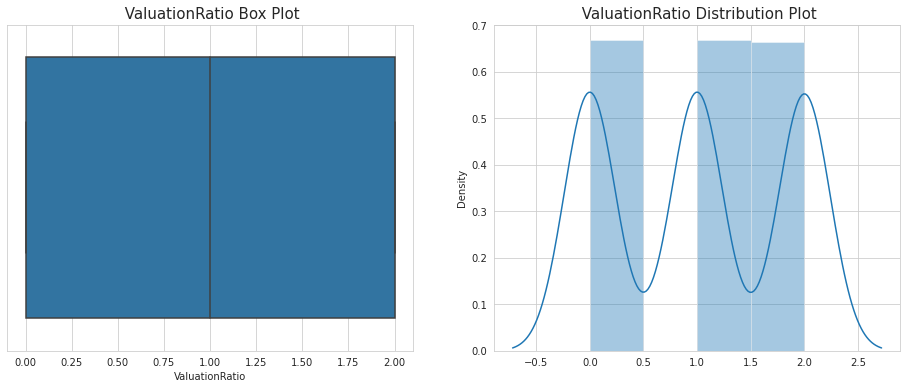

In [27]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="ValuationRatio",data=df_new)
plt.title(' ValuationRatio Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df_new["ValuationRatio"])
plt.title(' ValuationRatio Distribution Plot', fontsize=15)

## **Sınıflandırma modellerinde kullanılacak featureların seçimi**

In [28]:
Defans = df_new.loc[df_new.positionText=='Defender']

In [29]:
Defans.head()

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans,newTarget,ValuationRatio
18,32010,Caner,Erkin,Defender,Fenerbahce,3,181,76,32,1,0,0,34,30,4,2703,0,9,8,0,18.0,0.529412,0.000000,2.588235,44.000000,75.868984,0.705882,0.294118,0.058824,0.117647,0.470588,1.352941,1.470588,1.029412,0.176471,1.176471,0.823529,0.264706,2.529412,3.411765,0.000000,0.941176,1200000,1500000,1,0,1,1
22,319388,Valentin,Rosier,Defender,Besiktas,1,175,71,25,1,1,1,33,33,0,2917,1,6,8,0,14.0,0.424242,0.071429,0.939394,44.333333,81.749829,1.303030,0.696970,0.060606,1.121212,2.212121,2.242424,2.090909,1.727273,0.242424,1.424242,0.666667,0.060606,0.878788,1.666667,0.000000,1.272727,4000000,7500000,1,0,2,2
28,345370,Nazim,Sangaré,Defender,Fenerbahce,3,182,72,27,1,0,0,19,18,1,1589,1,1,2,0,7.0,0.368421,0.142857,0.894737,38.684211,80.680272,0.789474,1.789474,0.000000,0.526316,1.052632,2.736842,2.421053,0.947368,0.157895,1.736842,0.736842,0.210526,0.315789,1.157895,0.000000,1.263158,1800000,2500000,1,2,2,2
30,127681,Welinton,Souza Silva,Defender,Besiktas,1,181,81,32,1,0,1,35,34,1,2993,1,2,9,0,24.0,0.685714,0.041667,0.428571,69.114286,84.911120,0.200000,1.142857,0.057143,0.142857,0.400000,1.971429,1.600000,1.742857,0.485714,2.942857,0.885714,0.714286,0.171429,4.057143,0.000000,3.371429,1000000,1600000,1,0,2,2
33,243163,Ahmet,Oguz,Defender,Sivasspor,5,176,83,28,1,0,0,18,18,0,1507,0,3,2,0,5.0,0.277778,0.000000,0.611111,32.444444,71.746575,0.444444,1.833333,0.000000,0.611111,0.722222,3.277778,2.333333,1.944444,0.166667,2.555556,1.222222,0.111111,0.388889,1.611111,0.055556,1.555556,500000,800000,1,2,2,2


**Feature Scaling**

In [30]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["apps"]]
Defans["apps"] = scaler.fit_transform(dataset_numerical)

In [31]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["firstStart"]]
Defans["firstStart"] = scaler.fit_transform(dataset_numerical)

In [32]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["minsPlayed"]]
Defans["minsPlayed"] = scaler.fit_transform(dataset_numerical)

In [33]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["foulGivenPerGame"]]
Defans["foulGivenPerGame"] = scaler.fit_transform(dataset_numerical)

In [34]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["tacklePerGame"]]
Defans["tacklePerGame"] = scaler.fit_transform(dataset_numerical)

In [35]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["interceptionPerGame"]]
Defans["interceptionPerGame"] = scaler.fit_transform(dataset_numerical)

In [36]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["foulsPerGame"]]
Defans["foulsPerGame"] = scaler.fit_transform(dataset_numerical)

In [37]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["offsideWonPerGame"]]
Defans["offsideWonPerGame"] = scaler.fit_transform(dataset_numerical)

In [38]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["wasDribbledPerGame"]]
Defans["wasDribbledPerGame"] = scaler.fit_transform(dataset_numerical)

In [39]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["outfielderBlockPerGame"]]
Defans["outfielderBlockPerGame"] = scaler.fit_transform(dataset_numerical)

In [40]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["aerialWonPerGame"]]
Defans["aerialWonPerGame"] = scaler.fit_transform(dataset_numerical)

In [41]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["passSuccess"]]
Defans["passSuccess"] = scaler.fit_transform(dataset_numerical)

In [42]:
scaler= StandardScaler()
dataset_numerical = Defans.loc[:,["goal"]]
Defans["goal"] = scaler.fit_transform(dataset_numerical)

In [43]:
Defans[["newToTeam","newToLeague","foreign","apps" ,"firstStart" ,"minsPlayed" ,
        "foulGivenPerGame","tacklePerGame","interceptionPerGame","foulsPerGame",
        "offsideWonPerGame","wasDribbledPerGame","outfielderBlockPerGame",
        "aerialWonPerGame"
       , "passSuccess",
        "goal"]]
          


,newToTeam,newToLeague,foreign,apps,firstStart,minsPlayed,foulGivenPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,wasDribbledPerGame,outfielderBlockPerGame,aerialWonPerGame,passSuccess,goal
18,1,0,0,1.179558,0.961704,1.008598,-1.091807,0.138376,0.245540,0.485460,-0.662716,0.866861,-0.431436,-0.624576,-1.162616,-0.725772
22,1,1,1,1.059575,1.285923,1.269378,-0.082201,1.875740,1.657471,2.457653,-0.372571,0.306183,-1.192939,-0.239818,-0.003884,0.208265
28,1,0,0,-0.620180,-0.335172,-0.348923,2.655772,2.841451,2.408920,0.253601,-0.744436,0.557012,-0.633581,-0.250923,-0.214624,0.208265
30,1,0,1,1.299540,1.393996,1.361992,1.035257,1.346423,0.540098,2.501696,0.697720,1.089129,1.245963,2.195684,0.619000,0.208265
33,1,0,0,-0.740162,-0.335172,-0.448849,2.765691,3.898023,2.209260,3.071392,-0.705846,2.291918,-1.004503,0.088399,-1.974874,-0.725772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,-1.580040,-1.415902,-1.533403,-0.461920,-0.728565,0.002104,-0.368401,-1.439052,0.197870,0.276863,-1.083804,-4.080956,-0.725772
504,1,1,1,-1.700022,-1.523975,-1.423729,-0.826451,-0.746322,0.540098,-0.445475,-0.999128,0.067894,-0.672855,-0.672361,-0.796893,-0.725772
520,1,1,1,0.219698,-0.875537,-0.687694,-0.093885,-0.475875,-1.525927,0.076258,-1.100649,0.810254,-1.132060,-1.225821,0.168380,-0.725772
540,0,0,0,-0.740162,-1.199756,-1.027684,-0.993527,-0.550999,-0.952031,-1.167689,0.760566,0.107609,0.861015,-1.007611,0.867085,-0.725772


In [44]:
Defans.shape

(148, 48)

In [45]:
X = Defans[["newToTeam","newToLeague","foreign","apps" ,"firstStart" ,"minsPlayed" ,
        "foulGivenPerGame","tacklePerGame","interceptionPerGame","foulsPerGame",
        "offsideWonPerGame","wasDribbledPerGame","outfielderBlockPerGame",
        "aerialWonPerGame"
       , "passSuccess",
        "goal"]]
y = Defans["ValuationRatio"]

In [46]:
X.head() # Modele dahil edeceğimiz Kategorik değişkenlerimiz binary olduğu için bir encode işlemine gerek yok.

,newToTeam,newToLeague,foreign,apps,firstStart,minsPlayed,foulGivenPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,wasDribbledPerGame,outfielderBlockPerGame,aerialWonPerGame,passSuccess,goal
18,1,0,0,1.179558,0.961704,1.008598,-1.091807,0.138376,0.245540,0.485460,-0.662716,0.866861,-0.431436,-0.624576,-1.162616,-0.725772
22,1,1,1,1.059575,1.285923,1.269378,-0.082201,1.875740,1.657471,2.457653,-0.372571,0.306183,-1.192939,-0.239818,-0.003884,0.208265
28,1,0,0,-0.620180,-0.335172,-0.348923,2.655772,2.841451,2.408920,0.253601,-0.744436,0.557012,-0.633581,-0.250923,-0.214624,0.208265
30,1,0,1,1.299540,1.393996,1.361992,1.035257,1.346423,0.540098,2.501696,0.697720,1.089129,1.245963,2.195684,0.619000,0.208265
33,1,0,0,-0.740162,-0.335172,-0.448849,2.765691,3.898023,2.209260,3.071392,-0.705846,2.291918,-1.004503,0.088399,-1.974874,-0.725772


In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [48]:
df_new.loc[df_new.positionText == 'Defender'].ValuationRatio.value_counts()

0    52
2    49
1    47
Name: ValuationRatio, dtype: int64

In [49]:
print(f"Train set       --> feature size: {len(X_train)}, target size: {len(y_train)}")
print(f"Test set        --> feature size: {len(X_test)}, target size: {len(y_test)}")

Train set       --> feature size: 103, target size: 103
Test set        --> feature size: 45, target size: 45


# **Modelleme**

**Default Classifier**

In [50]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)

dummy_pred = clf.predict(X_test)
clf.score(X_test, y_test)


0.37777777777777777

In [51]:
print(classification_report(dummy_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        45
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.38        45
   macro avg       0.33      0.13      0.18        45
weighted avg       1.00      0.38      0.55        45



**XGBoost**

In [52]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)

In [53]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [54]:
y_predXGB = xgb_model.predict(X_test)
accuracy_score(y_test, y_predXGB)

0.3111111111111111

Text(33.0, 0.5, 'TRUE')

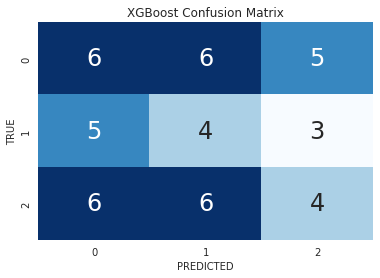

In [55]:
mtks = confusion_matrix(y_test, y_predXGB)
plt.title("XGBoost Confusion Matrix")
sns.heatmap(mtks,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [56]:
print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35        17
           1       0.25      0.33      0.29        12
           2       0.33      0.25      0.29        16

    accuracy                           0.31        45
   macro avg       0.31      0.31      0.31        45
weighted avg       0.32      0.31      0.31        45



**XGBoost modeline göre sınıflandırmada featureların etkilerini gösteren plot**

Text(0.5, 0, 'XGBoost Model Değişken Önem Düzeyleri')

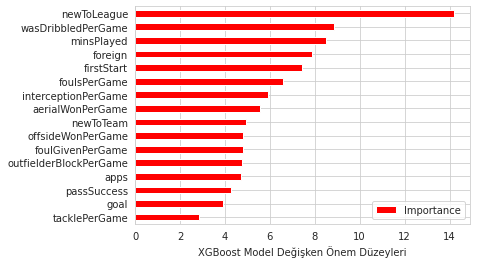

In [57]:
ImportanceXGB = pd.DataFrame({"Importance": xgb_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceXGB.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "red")

plt.xlabel("XGBoost Model Değişken Önem Düzeyleri")

**RandomForrest**

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_predRF = rf_model.predict(X_test)
accuracy_score(y_test, y_predRF)

0.4222222222222222

In [59]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Text(33.0, 0.5, 'TRUE')

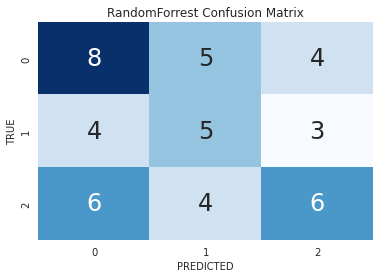

In [60]:
mtks2 = confusion_matrix(y_test, y_predRF)
plt.title("RandomForrest Confusion Matrix")
sns.heatmap(mtks2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

Text(0.5, 0, 'Random Forrest Model Değişken Önem Düzeyleri')

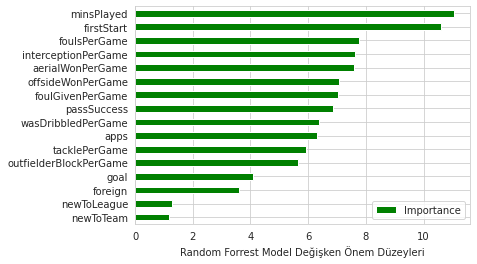

In [61]:
ImportanceRF = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceRF.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Random Forrest Model Değişken Önem Düzeyleri")

In [62]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.44      0.47      0.46        17
           1       0.36      0.42      0.38        12
           2       0.46      0.38      0.41        16

    accuracy                           0.42        45
   macro avg       0.42      0.42      0.42        45
weighted avg       0.43      0.42      0.42        45



**KNN**

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_predKNN = knn_model.predict(X_test)
accuracy_score(y_test, y_predKNN)

0.37777777777777777

In [64]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Text(33.0, 0.5, 'TRUE')

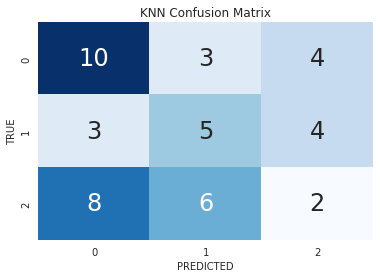

In [65]:
mtks3 = confusion_matrix(y_test, y_predKNN)
plt.title("KNN Confusion Matrix")
sns.heatmap(mtks3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [66]:
print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53        17
           1       0.36      0.42      0.38        12
           2       0.20      0.12      0.15        16

    accuracy                           0.38        45
   macro avg       0.34      0.38      0.35        45
weighted avg       0.35      0.38      0.36        45



**Decision Tree -- CART**

In [67]:
from sklearn.tree import DecisionTreeClassifier #CART
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train, y_train)
y_predDT = DT_model.predict(X_test)
accuracy_score(y_test, y_predDT)

0.2222222222222222

In [68]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Text(33.0, 0.5, 'TRUE')

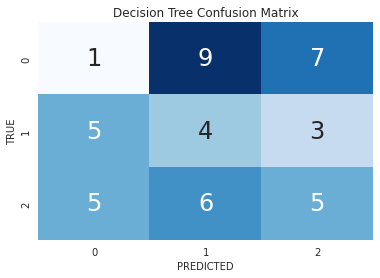

In [69]:
mtks4 = confusion_matrix(y_test, y_predDT)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(mtks4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [70]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.09      0.06      0.07        17
           1       0.21      0.33      0.26        12
           2       0.33      0.31      0.32        16

    accuracy                           0.22        45
   macro avg       0.21      0.23      0.22        45
weighted avg       0.21      0.22      0.21        45



Text(0.5, 0, 'Decision Tree Model Değişken Önem Düzeyleri')

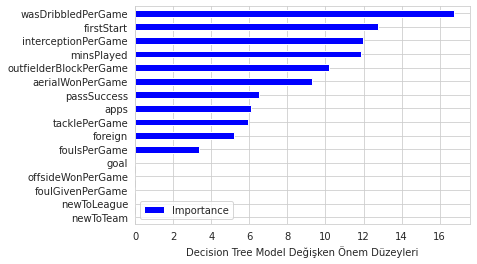

In [71]:
ImportanceDT = pd.DataFrame({"Importance": DT_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceDT.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Decision Tree Model Değişken Önem Düzeyleri")

**Gradient Boosting Machines**

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_predGBM = gbm_model.predict(X_test)
accuracy_score(y_test, y_predGBM)

0.28888888888888886

In [73]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Text(33.0, 0.5, 'TRUE')

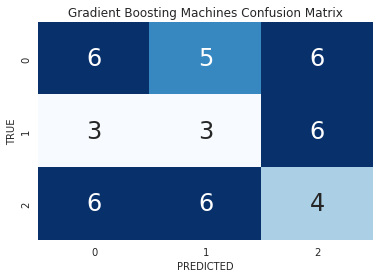

In [74]:
mtks5 = confusion_matrix(y_test, y_predGBM)
plt.title("Gradient Boosting Machines Confusion Matrix")
sns.heatmap(mtks5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [75]:
print(classification_report(y_test, y_predGBM))

              precision    recall  f1-score   support

           0       0.40      0.35      0.38        17
           1       0.21      0.25      0.23        12
           2       0.25      0.25      0.25        16

    accuracy                           0.29        45
   macro avg       0.29      0.28      0.29        45
weighted avg       0.30      0.29      0.29        45



Text(0.5, 0, 'GBM Model Değişken Önem Düzeyleri')

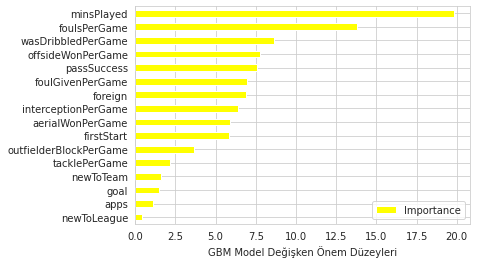

In [76]:
ImportanceGBM = pd.DataFrame({"Importance": gbm_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceGBM.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "yellow")

plt.xlabel("GBM Model Değişken Önem Düzeyleri")

**Logistic Regression**

In [77]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(multi_class='multinomial')
loj_model = loj.fit(X_train, y_train)
y_predLOJ = loj_model.predict(X_test)
accuracy_score(y_test, y_predLOJ)

0.4222222222222222

In [78]:
loj_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Text(33.0, 0.5, 'TRUE')

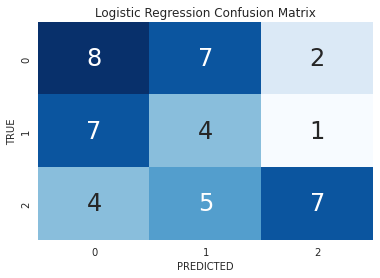

In [79]:
mtks6 = confusion_matrix(y_test, y_predLOJ)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(mtks6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [80]:
print(classification_report(y_test, y_predLOJ))

              precision    recall  f1-score   support

           0       0.42      0.47      0.44        17
           1       0.25      0.33      0.29        12
           2       0.70      0.44      0.54        16

    accuracy                           0.42        45
   macro avg       0.46      0.41      0.42        45
weighted avg       0.47      0.42      0.44        45



**SVM**

In [81]:
from sklearn.svm import SVC
svm_model = SVC().fit(X_train, y_train)
y_predSVM = svm_model.predict(X_test)
accuracy_score(y_test, y_predSVM)

0.37777777777777777

In [82]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Text(33.0, 0.5, 'TRUE')

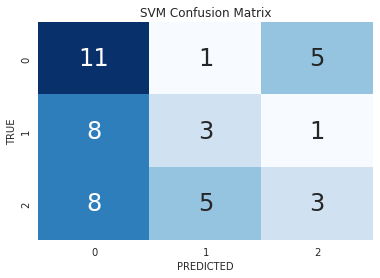

In [83]:
mtks7 = confusion_matrix(y_test, y_predSVM)
plt.title("SVM Confusion Matrix")
sns.heatmap(mtks7,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [84]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.41      0.65      0.50        17
           1       0.33      0.25      0.29        12
           2       0.33      0.19      0.24        16

    accuracy                           0.38        45
   macro avg       0.36      0.36      0.34        45
weighted avg       0.36      0.38      0.35        45



# **Modellerin Kıyaslanması**

In [85]:
accuracies = {}
accuracies['LogisticReg.'] = round(accuracy_score(y_test, y_predLOJ),2)
accuracies['GradientBoostingMachine'] = round(accuracy_score(y_test, y_predGBM),2)
accuracies['DecisionTree'] = round(accuracy_score(y_test, y_predDT),2)
accuracies['RandomForrest'] = round(accuracy_score(y_test, y_predRF),2)
accuracies['KNN'] = round(accuracy_score(y_test, y_predKNN),2)
accuracies['XGBoost'] = round(accuracy_score(y_test, y_predXGB),2)
accuracies['SVM'] = round(accuracy_score(y_test, y_predSVM),2)

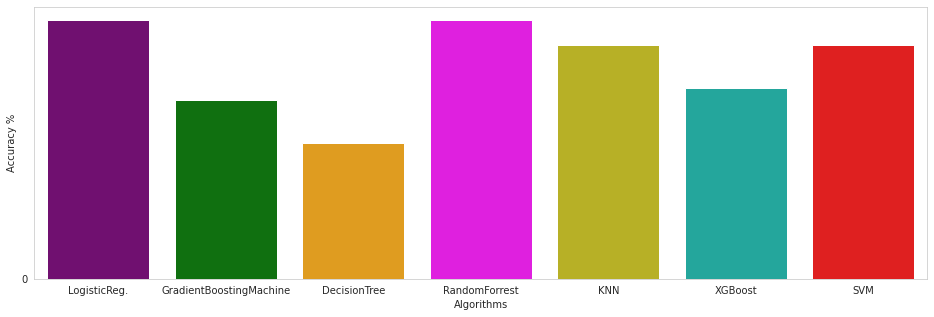

In [86]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'red']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [87]:
indexr=['Accuracy']
df_acc = pd.DataFrame(accuracies,index=indexr)
df_acc


,LogisticReg.,GradientBoostingMachine,DecisionTree,RandomForrest,KNN,XGBoost,SVM
Accuracy,0.42,0.29,0.22,0.42,0.38,0.31,0.38
